# Atividade 2

In [62]:
import numpy as np
from PIL import Image
import math
from IPython.display import display
from numba import njit
import matplotlib.pyplot as plt

In [63]:
@njit
def transform_255(img: np.ndarray) -> np.ndarray:
    fm = img - np.min(img)
    fs = 255 * (fm / np.amax(fm))
    return fs

## Suavizar

In [64]:
# box filter kernel
@njit
def suavizar_box(img: np.ndarray, kernel_size: tuple[int, int]) -> np.ndarray:
    h, w = img.shape[:2]
    img_new = np.empty(img.shape, dtype=np.uint8)
    # constante
    c = 1 / (kernel_size[0] * kernel_size[1])
    # normaliza para o centro do kernel
    wy = math.floor(kernel_size[0] / 2)
    wx = math.floor(kernel_size[1] / 2)
    for y in range(h):
        for x in range(w):
            pixel = 0
            for i in range(-wy, wy + 1):
                for j in range(-wx, wx + 1):
                    # zero padding
                    vy = y + i
                    vx = x + j
                    pixel += img[vy][vx] if 0 <= vy < h and 0 <= vx < w else 0
            img_new[y][x] = pixel * c
    return img_new


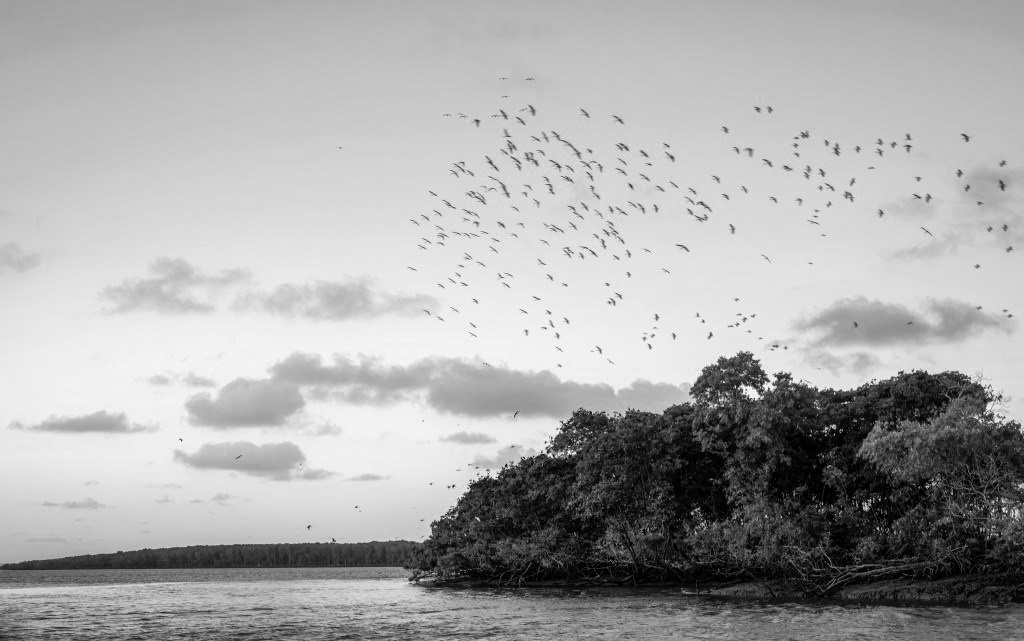

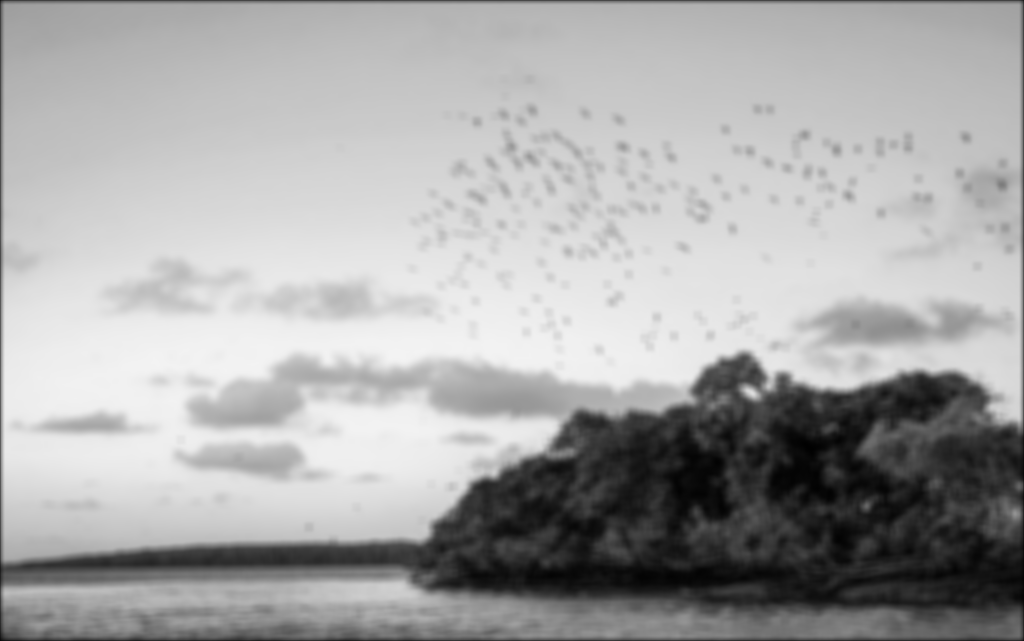

In [65]:
im = Image.open("data/suavizar/Suavizar_(1).jpg")
display(im)

im_array = np.array(im)

im_suav = suavizar_box(im_array, (9,9))
im_suav = suavizar_box(im_suav, (3,3))


im_suav = Image.fromarray(im_suav)
im_suav.save("data/suavizar/result/Suavizar_box_(1).jpg")
im_suav

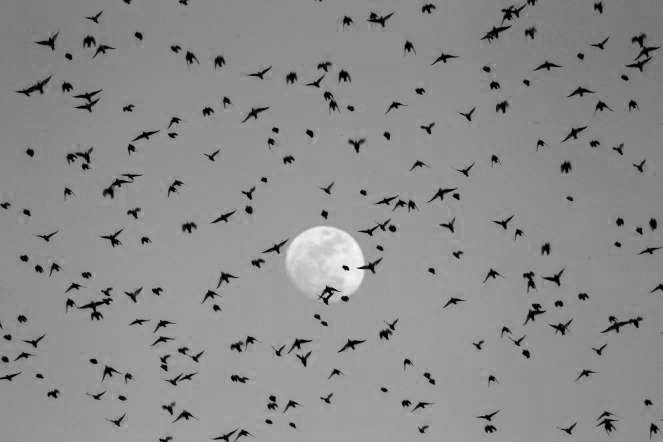

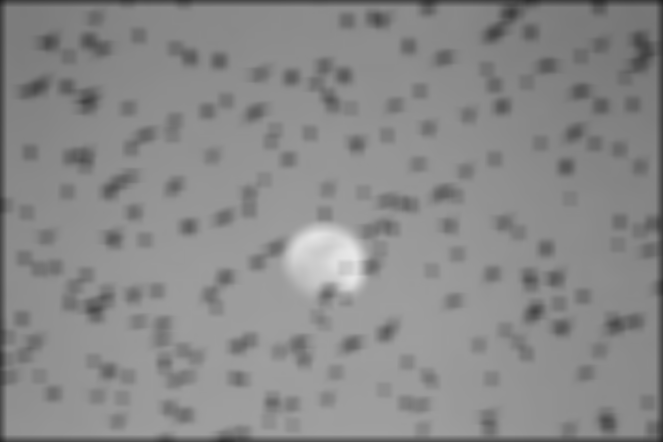

In [66]:
im = Image.open("data/suavizar/Suavizar_(2).jpg")
display(im)

im_array = np.array(im)

im_suav = suavizar_box(im_array, (15,15))

im_suav = Image.fromarray(im_suav)
im_suav.save("data/suavizar/result/Suavizar_box_(2).jpg")
im_suav

## Aguçar

In [67]:
@njit
def agucar_laplace(img: np.ndarray, kernel_size: tuple[int, int]) -> np.ndarray:
    h, w = img.shape[:2]
    img_new = np.empty(img.shape)
    wy = math.floor(kernel_size[0] / 2)
    wx = math.floor(kernel_size[1] / 2)
    k = kernel_size[0] * kernel_size[1] - 1
    for y in range(h):
        for x in range(w):
            pixel = (-k) * img[y][x]
            for i in range(-wy, wy + 1):
                for j in range(-wx, wx + 1):
                    if i == 0 and j == 0:
                        continue
                    # zero padding
                    vy = y + i
                    vx = x + j
                    pixel += img[vy][vx] if 0 <= vy < h and 0 <= vx < w else 0
            img_new[y][x] = img[y][x] - pixel
    img_new = transform_255(img_new)
    # return img_new.astype(np.uint8)
    return transform_255(img_new + img).astype(np.uint8)

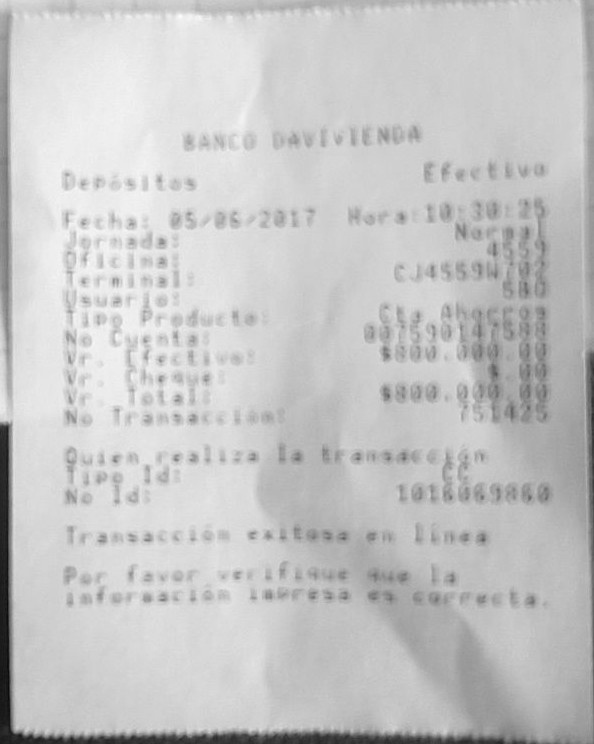

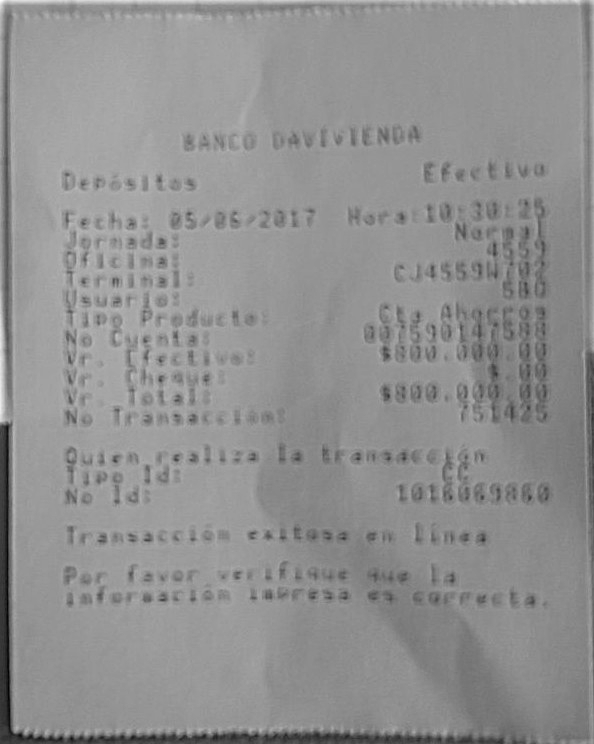

In [71]:
im = Image.open("data/agucar/Agucar_(1).jpg")
display(im)

im_array = np.array(im)

im_agucar = agucar_laplace(im_array, (11, 11))

im_agucar = Image.fromarray(im_agucar.astype(np.uint8)) 
im_agucar.save("data/agucar/result/Agucar_laplace_(1).jpg")
im_agucar


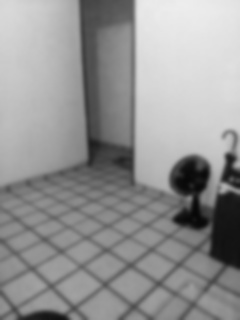

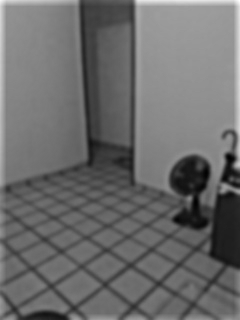

In [69]:
im = Image.open("data/agucar/Agucar_(2).jpg")
display(im)

im_array = np.array(im)

im_agucar = agucar_laplace(im_array, (13, 13))

im_agucar = Image.fromarray(im_agucar)
im_agucar.save("data/agucar/result/Agucar_laplace_(2).jpg")
im_agucar
